In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# sku: Identificador de producto relacionado al evento.
# Por esa razon lo consideramos object
df = pd.read_csv('data/events.csv', dtype={'sku':object})

In [12]:
# veamos el shape que tiene el dataset
df.shape

(1011288, 23)

In [13]:
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [15]:
# veamos los tipos de las variables
df.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

Evidentemente son todos strings.

# Data cleaning

***
## Fechas

Empecemos por convertir los timestamps en algo legible

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [4]:
# separemos las cosas para que quede algo manejable; no tiene sentido tener el timestamp todo junto
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['weekday'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

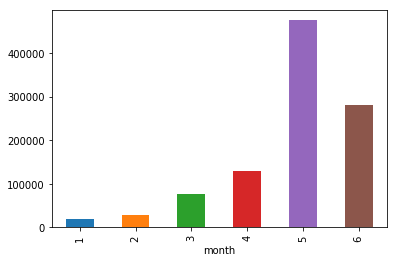

In [5]:
df.groupby('month').count()['person'].plot(kind='bar')

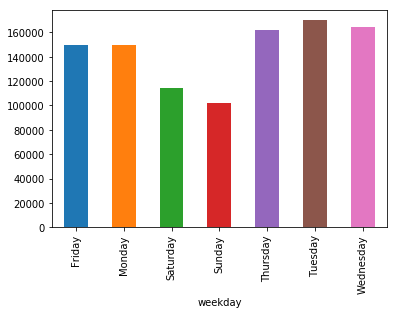

In [6]:
df.groupby('weekday').count()['person'].plot(kind='bar')

Se puede observar que hay menos trafico los fines de semana. Fuera de eso, los niveles se mantienen similares.

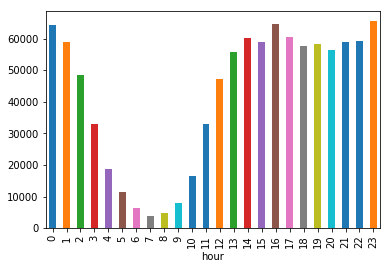

In [7]:
df.groupby('hour').count()['person'].plot(kind='bar')

Aca hay un tema: más adelante vemos que hay varios países. Pero no tenemos datos de la zona horaria de los timestamps. Entonces si bien podemos hacer algún tipo de análisis, no hay que perder de vista este "detalle".

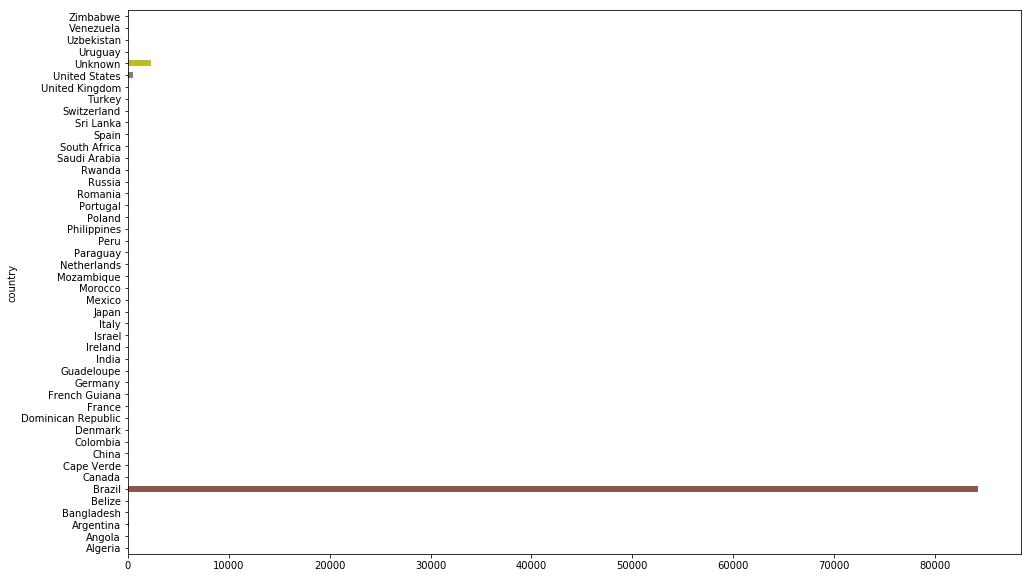

In [8]:
# TODO display countries in order
df.groupby('country').count()['person'].plot(kind='barh', figsize=(16,10))

Basicamente, si bien hay "muchos" paises, el grosso es de Brasil. Hay algo de Unknown... y muy poco de EEUU.

***
## Event

In [ ]:
len(df.event.unique())

In [ ]:
for ev in df.event.unique():
    print(ev)

***
## Person

In [ ]:
len(df.person.unique())

In [ ]:
df['person'].head()

Al parecer esto es un `id` de persona.

***
## url

In [ ]:
len(df.url.unique())

In [ ]:
df['url'].head()

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['url'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

`TODO` pensar en esto. Hay un 90% de nans en esta columna. Por ahi es porque no corresponde en todos los casos, pero de todas formas es para revisar.

***
## sku

In [ ]:
len(df.sku.unique())

In [ ]:
df['sku'].head()

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['sku'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

`TODO` pensar en esto.

***
## model

In [ ]:
len(df.model.unique())

In [ ]:
df['model'].head()

***
## condition

In [ ]:
len(df.condition.unique())

In [ ]:
for ev in df.condition.unique():
    print(ev)

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['condition'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

`TODO` pensar en esto. Hay un 45% de nans en esta columna. No es tan tragico como antes, pero no es despreciable tampoco.

***
## model

In [ ]:
len(df.model.unique())

In [ ]:
df['model'].head()

***
## storage

In [ ]:
len(df.storage.unique())

In [ ]:
for ev in df.storage.unique():
    print(ev)

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['storage'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

`TODO` pensar en esto. Hay un 45% de nans en esta columna. No es tan tragico como antes, pero no es despreciable tampoco.

`OBSERVACION!` Se esta repitiendo el porcentaje de nans. Podriamos suponer que la informacion faltante es de los mismos registros.

***
## Color

In [ ]:
len(df.color.unique())

Habra `NaNs`?

In [ ]:
cant_nans = len(df) - df['color'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

`TODO` pensar en esto. Hay un 45% de nans en esta columna. No es tan tragico como antes, pero no es despreciable tampoco.

***
## skus

Probablemente la correlacion sea alta con `sku`. Si miramos los datos que nos dan, tienen definiciones un tanto similares:<br>
    **sku**: Identificador de producto relacionado al evento.<br>
    **skus**: Identificadores de productos visualizados en el evento.

In [ ]:
len(df.color.unique())

***
## search term

In [ ]:
len(df.search_term.unique())

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['search_term'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

`ALERT!` Uhh, muuchos nans!  
Pero tambien es logico porque hay solamente una parte de events que vienen a partir de una busqueda.

`TODO` ver https://medium.com/@dudsdu/an-example-of-word-cloud-with-mask-4cbbd699fb14

***
## static page

In [ ]:
len(df.staticpage.unique())

In [ ]:
for ev in df.staticpage.unique():
    print(ev)

***
Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['staticpage'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

***
## campaign source

In [ ]:
len(df.campaign_source.unique())

In [ ]:
for ev in df.campaign_source.unique():
    print(ev)

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['campaign_source'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

***
## search engine

In [ ]:
len(df.search_engine.unique())

In [ ]:
for ev in df.search_engine.unique():
    print(ev)

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['search_engine'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

***
## channel

In [ ]:
len(df.channel.unique())

In [ ]:
for ev in df.channel.unique():
    print(ev)

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['channel'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

***
## new vs returning

In [ ]:
len(df.new_vs_returning.unique())

In [ ]:
for ev in df.new_vs_returning.unique():
    print(ev)

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['new_vs_returning'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

***
## city

In [9]:
len(df.city.dropna().unique())

1939

In [10]:
cities = df.city.dropna().unique()

In [11]:
df.city.head()

0           NaN
1    Camaragibe
2           NaN
3           NaN
4           NaN
Name: city, dtype: object

Habra muchos `NaNs`?

In [12]:
cant_nans = len(df) - df['city'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

cantidad nans: 923910
porcentaje nans: 0.9135973135249306


#### Mapas related
Consigamos las coordenadas de las ciudades para poder graficarlas en un mapa y ver visualmente donde estan los clientes. Se podria dibujar circulos con radio en funcion de la cantidad de compras del lugar, para tener una idea de la importancia de cada lugar para el estudio de mercado. 

In [13]:
# create cities df
cities_df = pd.DataFrame(cities, columns=['city'])

In [14]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="oiudsf")

In [15]:
from geopy.exc import GeocoderTimedOut
import time

def get_coords(index, x):
    if index % 50 == 0:
        time.sleep(60)
    res = geolocator.geocode(x)
    try:
        return [res.latitude, res.longitude]
    except GeocoderTimedOut:
        return get_coords(x)
    except:
        return [None, None]

In [16]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [17]:
cities_df.shape

(1939, 1)

In [18]:
# Due to various types of errors during the requests to get the coordinates of the cities,
# the dataframe has been split in many dataframes of 50 rows each. This way, the requests still
# failed sometimes, but since some dataframes have already been completed, those could
# be commented out, rerunning the missing ones. In the end, all datafarmes are concatenated
# into one big dataframe containing all wanted information. This dataframe is saved into a csv file,
# which is loaded again at the end of all this commented code.
#
# NOTE: DO NOT UNCOMMENT THIS CODE. Its purpose has already been satisfied.
# Execute the cell with the 'read_csv' command directly, which reads the completed dataframe.

# cities_df_1 = cities_df.loc[:50]
# cities_df_2 = cities_df.loc[51:100]
# cities_df_3 = cities_df.loc[101:150]
# cities_df_4 = cities_df.loc[151:200]
# cities_df_5 = cities_df.loc[201:250]
# cities_df_6 = cities_df.loc[251:300]
# cities_df_7 = cities_df.loc[301:350]
# cities_df_8 = cities_df.loc[351:400]
# cities_df_9 = cities_df.loc[401:450]
# cities_df_10 = cities_df.loc[451:500]
# cities_df_11 = cities_df.loc[501:550]
# cities_df_12 = cities_df.loc[551:600]
# cities_df_13 = cities_df.loc[601:650]
# cities_df_14 = cities_df.loc[651:700]
# cities_df_15 = cities_df.loc[701:750]
# cities_df_16 = cities_df.loc[751:800]
# cities_df_17 = cities_df.loc[801:850]
# cities_df_18 = cities_df.loc[851:900]
# cities_df_19 = cities_df.loc[901:950]
# cities_df_20 = cities_df.loc[951:1000]
# cities_df_21 = cities_df.loc[1001:1050]
# cities_df_22 = cities_df.loc[1051:1100]
# cities_df_23 = cities_df.loc[1101:1150]
# cities_df_24 = cities_df.loc[1151:1200]
# cities_df_25 = cities_df.loc[1201:1250]
# cities_df_26 = cities_df.loc[1251:1300]
# cities_df_27 = cities_df.loc[1301:1350]
# cities_df_28 = cities_df.loc[1351:1400]
# cities_df_29 = cities_df.loc[1401:1450]
# cities_df_30 = cities_df.loc[1451:1500]
# cities_df_31 = cities_df.loc[1501:1550]
# cities_df_32 = cities_df.loc[1551:1600]
# cities_df_33 = cities_df.loc[1601:1650]
# cities_df_34 = cities_df.loc[1651:1700]
# cities_df_35 = cities_df.loc[1701:1750]
# cities_df_36 = cities_df.loc[1751:1800]
# cities_df_37 = cities_df.loc[1801:1850]
# cities_df_38 = cities_df.loc[1851:1900]
# cities_df_39 = cities_df.loc[1901:1939]

In [19]:
# cities_df_1[['city_lat', 'city_long']] = cities_df_1.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_2[['city_lat', 'city_long']] = cities_df_2.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_3[['city_lat', 'city_long']] = cities_df_3.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_4[['city_lat', 'city_long']] = cities_df_4.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_5[['city_lat', 'city_long']] = cities_df_5.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_6[['city_lat', 'city_long']] = cities_df_6.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_7[['city_lat', 'city_long']] = cities_df_7.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_8[['city_lat', 'city_long']] = cities_df_8.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_9[['city_lat', 'city_long']] = cities_df_9.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_10[['city_lat', 'city_long']] = cities_df_10.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_11[['city_lat', 'city_long']] = cities_df_11.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_12[['city_lat', 'city_long']] = cities_df_12.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_13[['city_lat', 'city_long']] = cities_df_13.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_14[['city_lat', 'city_long']] = cities_df_14.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_15[['city_lat', 'city_long']] = cities_df_15.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_16[['city_lat', 'city_long']] = cities_df_16.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_17[['city_lat', 'city_long']] = cities_df_17.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_18[['city_lat', 'city_long']] = cities_df_18.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_19[['city_lat', 'city_long']] = cities_df_19.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_20[['city_lat', 'city_long']] = cities_df_20.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_21[['city_lat', 'city_long']] = cities_df_21.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_22[['city_lat', 'city_long']] = cities_df_22.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_23[['city_lat', 'city_long']] = cities_df_23.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_24[['city_lat', 'city_long']] = cities_df_24.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_25[['city_lat', 'city_long']] = cities_df_25.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_26[['city_lat', 'city_long']] = cities_df_26.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_27[['city_lat', 'city_long']] = cities_df_27.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_28[['city_lat', 'city_long']] = cities_df_28.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_29[['city_lat', 'city_long']] = cities_df_29.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_30[['city_lat', 'city_long']] = cities_df_30.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_31[['city_lat', 'city_long']] = cities_df_31.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_32[['city_lat', 'city_long']] = cities_df_32.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_33[['city_lat', 'city_long']] = cities_df_33.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_34[['city_lat', 'city_long']] = cities_df_34.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_35[['city_lat', 'city_long']] = cities_df_35.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_36[['city_lat', 'city_long']] = cities_df_36.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_37[['city_lat', 'city_long']] = cities_df_37.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_38[['city_lat', 'city_long']] = cities_df_38.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)
# cities_df_39[['city_lat', 'city_long']] = cities_df_39.apply(lambda row: pd.Series(get_coords(row.name,row['city'])), axis=1)

In [20]:
# cities_df_1.to_csv('data/cities_w_coords_1')
# cities_df_2.to_csv('data/cities_w_coords_2')
# cities_df_3.to_csv('data/cities_w_coords_3')
# cities_df_4.to_csv('data/cities_w_coords_4')
# cities_df_5.to_csv('data/cities_w_coords_5')
# cities_df_6.to_csv('data/cities_w_coords_6')
# cities_df_7.to_csv('data/cities_w_coords_7')
# cities_df_8.to_csv('data/cities_w_coords_8')
# cities_df_9.to_csv('data/cities_w_coords_9')
# cities_df_10.to_csv('data/cities_w_coords_10')
# cities_df_11.to_csv('data/cities_w_coords_11')
# cities_df_12.to_csv('data/cities_w_coords_12')
# cities_df_13.to_csv('data/cities_w_coords_13')
# cities_df_14.to_csv('data/cities_w_coords_14')
# cities_df_15.to_csv('data/cities_w_coords_15')
# cities_df_16.to_csv('data/cities_w_coords_16')
# cities_df_17.to_csv('data/cities_w_coords_17')
# cities_df_18.to_csv('data/cities_w_coords_18')
# cities_df_19.to_csv('data/cities_w_coords_19')
# cities_df_20.to_csv('data/cities_w_coords_20')
# cities_df_21.to_csv('data/cities_w_coords_21')
# cities_df_22.to_csv('data/cities_w_coords_22')
# cities_df_23.to_csv('data/cities_w_coords_23')
# cities_df_24.to_csv('data/cities_w_coords_24')
# cities_df_25.to_csv('data/cities_w_coords_25')
# cities_df_26.to_csv('data/cities_w_coords_26')
# cities_df_27.to_csv('data/cities_w_coords_27')
# cities_df_28.to_csv('data/cities_w_coords_28')
# cities_df_29.to_csv('data/cities_w_coords_29')
# cities_df_30.to_csv('data/cities_w_coords_30')
# cities_df_31.to_csv('data/cities_w_coords_31')
# cities_df_32.to_csv('data/cities_w_coords_32')
# cities_df_33.to_csv('data/cities_w_coords_33')
# cities_df_34.to_csv('data/cities_w_coords_34')
# cities_df_35.to_csv('data/cities_w_coords_35')
# cities_df_36.to_csv('data/cities_w_coords_36')
# cities_df_37.to_csv('data/cities_w_coords_37')
# cities_df_38.to_csv('data/cities_w_coords_38')
# cities_df_39.to_csv('data/cities_w_coords_39')

In [21]:
# cities_with_coordinates = pd.concat([cities_df_1,
#                                      cities_df_2,
#                                      cities_df_3,
#                                      cities_df_4,
#                                      cities_df_5,
#                                      cities_df_6,
#                                      cities_df_7,
#                                      cities_df_8,
#                                      cities_df_9,
#                                      cities_df_10,
#                                      cities_df_11,
#                                      cities_df_12,
#                                      cities_df_13,
#                                      cities_df_14,
#                                      cities_df_15,
#                                      cities_df_16,
#                                      cities_df_17,
#                                      cities_df_18,
#                                      cities_df_19,
#                                      cities_df_20,
#                                      cities_df_21,
#                                      cities_df_22,
#                                      cities_df_23,
#                                      cities_df_24,
#                                      cities_df_25,
#                                      cities_df_26,
#                                      cities_df_27,
#                                      cities_df_28,
#                                      cities_df_29,
#                                      cities_df_30,
#                                      cities_df_31,
#                                      cities_df_32,
#                                      cities_df_33,
#                                      cities_df_34,
#                                      cities_df_35,
#                                      cities_df_36,
#                                      cities_df_37,
#                                      cities_df_38,
#                                      cities_df_39])

In [22]:
# cities_with_coordinates.to_csv('data/cities_w_coords.csv')

In [5]:
cities_with_coordinates = pd.read_csv('data/cities_w_coords2.csv', index_col=False)

In [103]:
cities_with_coordinates.head()

,city,city_lat,city_long
0,Camaragibe,-8.021383,-34.981077
1,Rio de Janeiro,-22.911014,-43.209373
2,Ribeirão Preto,-21.178333,-47.806667
3,Unknown,25.038705,-77.294154
4,Porto Alegre,-30.032500,-51.230377


In [104]:
cities_with_coordinates.loc[cities_with_coordinates.city_lat.isna()]

,city,city_lat,city_long
17,Aldeia Amanajas Tauai,NaN,NaN
141,Posto Fiscal Rolim de Moura,NaN,NaN
1142,Sacramento,NaN,NaN
1319,Delta,NaN,NaN
1530,Matoes dos Caboclos,NaN,NaN
1747,Hopkins,NaN,NaN


For cities which could be in more than one country, the country feature is also read.

In [105]:
df.loc[df['city'] == 'Sacramento'][['country']]

,country
241152,Brazil
241269,Brazil
241322,Brazil
379271,Brazil
448049,Brazil
448076,Brazil
551757,Brazil
758267,Brazil
940340,Brazil


In [106]:
df.loc[df['city'] == 'Delta'][['country']]

,country
326401,Brazil
709462,Brazil


In [107]:
df.loc[df['city'] == 'Hopkins'][['country', 'region']]

,country,region
683849,United States,Minnesota


```
Aldeia Amanajas Tauai:       -4.526841,  -47.360329
Posto Fiscal Rolim de Moura: -13.068335, -62.293185
Sacramento:                  -19.8656,   -47.4402
Delta:                       -19.9720,   -47.7758
Matoes dos Caboclos:         -5.520096,  -43.204281
Hopkins:                      44.925963, -93.403434
```

Lets complete these 6 missing values by hand.

In [108]:
cities_with_coordinates.head(1)

,city,city_lat,city_long
0,Camaragibe,-8.021383,-34.981077


In [11]:
cities_with_coordinates.shape

(1945, 3)

In [6]:
cities_with_coordinates.dropna(inplace=True)

In [7]:
cities_with_coordinates = pd.concat([cities_with_coordinates, 
                                     pd.DataFrame({'city':['Aldeia Amanajas Tauai','Posto Fiscal Rolim de Moura','Sacramento','Delta','Matoes dos Caboclos','Hopkins'],
                                                   'city_lat':[-4.526841,-13.068335,19.8656,-19.9720,-5.520096,44.925963],
                                                   'city_long':[-47.360329,-62.293185,-47.4402,-47.7758,-43.204281,-93.403434]})])

In [8]:
# re check there are no empty cities
cant_nans = len(cities_with_coordinates) - cities_with_coordinates['city'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(cities_with_coordinates)))

cantidad nans: 0
porcentaje nans: 0.0


In [9]:
cities_with_coordinates.shape

(1939, 3)

In [11]:
# Lets join the dfs
df.merge(cities_with_coordinates, on=('city'), how='left')

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,screen_resolution,operating_system_version,browser_version,year,month,day,weekday,hour,city_lat,city_long
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2018,5,31,Thursday,23,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360x640,Android 6,Chrome Mobile 39,2018,5,31,Thursday,23,-8.021383,-34.981077
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,2018,5,31,Thursday,23,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,2018,5,31,Thursday,23,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,2018,5,29,Tuesday,13,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,360x640,Android 5.1.1,Android 5.1,2018,5,29,Tuesday,13,-22.911014,-43.209373
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2018,5,29,Tuesday,13,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,2018,5,29,Tuesday,13,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,2018,4,9,Monday,20,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1920x1080,Windows 10,Chrome 65.0,2018,4,9,Monday,20,-22.911014,-43.209373


## Plotting cities on a map

In [10]:
import folium

In [17]:
from folium.plugins import MarkerCluster

avg_lat = cities_with_coordinates['city_lat'].mean()
avg_long = cities_with_coordinates['city_long'].mean()

m = folium.Map(location=[0, 0], zoom_start=2)

marker_cluster = MarkerCluster().add_to(m)

for lat, lon, city in zip(cities_with_coordinates.city_lat, cities_with_coordinates.city_long, cities_with_coordinates.city):
    folium.Marker(location=[lat, lon]).add_to(marker_cluster)
#                   popup=folium.Popup(city, parse_html=True)).add_to(marker_cluster)



# for lat, lon, nombre in zip(dfEstaciones.lat, dfEstaciones.long, dfEstaciones.name):
#     folium.Marker(location=[lat,lon], popup=nombre).add_to(clusterDeUbicaciones)

m

`TODO` ver que se puede saacar con esto. Muy bueno lo de meter graficos en los mapas directamente.  
http://nbviewer.jupyter.org/github/bibmartin/folium/blob/issue288/examples/Popups.ipynb  
https://www.kaggle.com/dabaker/fancy-folium

***
## region

In [ ]:
len(df.region.unique())

In [ ]:
df.region.head()

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['region'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

#### Mapas related

***
## country

In [ ]:
len(df.country.unique())

In [ ]:
for ev in df.country.unique():
    print(ev)

***
## device type

In [ ]:
len(df.device_type.unique())

In [ ]:
for ev in df.device_type.unique():
    print(ev)

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['device_type'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

Pasa aca, y no es el unico lugar, de que hay tanto `nan` como `unknown`. Hay que ver si el valor se puede deducir de algun otro dato, o de lo contrario, como habra que manejar este tema.  
No es del todo incorrecto. Porque `nan` indicaria que no corresponde, y `unknown` que si corresponde, pero se desconoce el valor.

***
## screen resolution

In [ ]:
len(df.screen_resolution.unique())

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['screen_resolution'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

***
## os version

In [ ]:
len(df.operating_system_version.unique())

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['operating_system_version'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))

***
## browser version

In [ ]:
len(df.browser_version.unique())

Habra muchos `NaNs`?

In [ ]:
cant_nans = len(df) - df['browser_version'].count()
print("cantidad nans: " + str(cant_nans))
print("porcentaje nans: " + str(cant_nans/len(df)))